In [1486]:
#Salary Prediction Classification

In [1487]:
#In this project, we use supervised learning models to identify a resident who are likely gain high-salary. 
#Furthermore, we will analyze top factors that influence income. 
#[Dataset information] (https://www.kaggle.com/datasets/ayessa/salary-prediction-classification).

In [1488]:
#Part 1 Data Exploration

In [1489]:
#Part 1.1: Understand the Raw Dataset
import pandas as pd
import numpy as np

salary_df = pd.read_csv(r'C:\Users\Apple\Desktop\Class 19 Project\salary.csv')
salary_df["salary"]=[0 if i==' <=50K' else 1 for i in salary_df["salary"]]
salary_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [1490]:
# check data info
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [1491]:
# check the unique values for each column
salary_df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
salary                2
dtype: int64

In [1492]:
# Get target variable
y = salary_df['salary']

In [1493]:
#Part 1.2: Understand the features
# check missing values
salary_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [1494]:
# understand Numerical feature
# discrete/continuous
# 0 discrete feature
# 6 continuous features age/fnlwgt/education-num/capital-gain/capital-loss/hours-per-week
salary_df[['age', 'fnlwgt', 'education-num', 'capital-gain','capital-loss', 'hours-per-week']].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [1495]:
# check the feature distribution
# pandas.DataFrame.describe()
# boxplot, distplot, countplot
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='salary', ylabel='hours-per-week'>

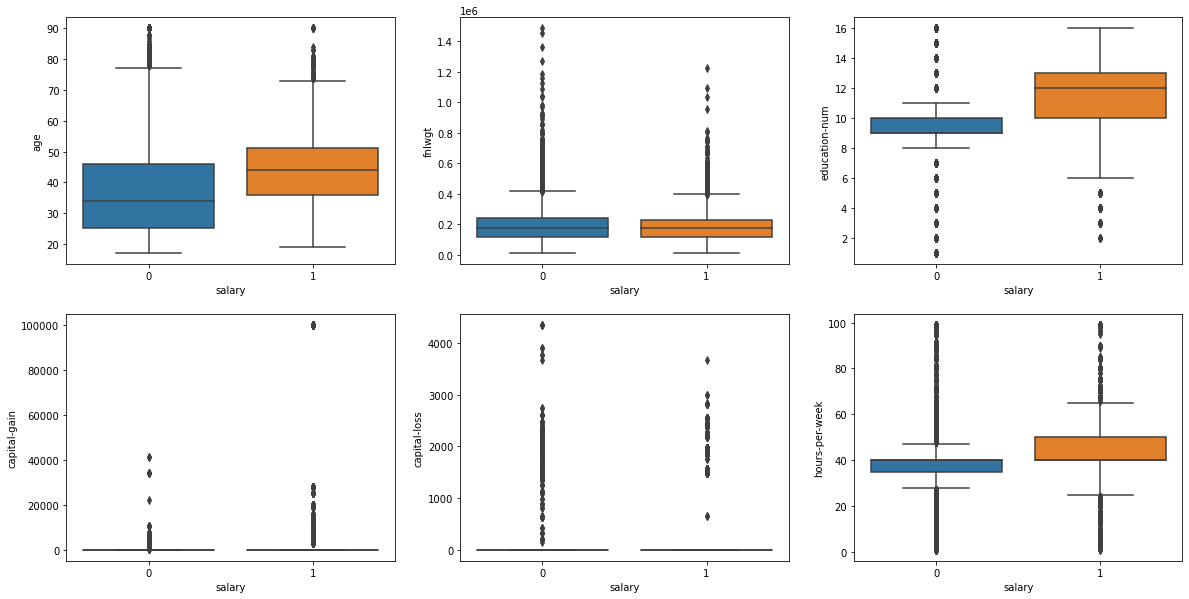

In [1496]:
# boxplot for numerical feature
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='salary', y ='age', data=salary_df, ax=axss[0][0])
sns.boxplot(x='salary', y ='fnlwgt', data=salary_df, ax=axss[0][1])
sns.boxplot(x='salary', y ='education-num', data=salary_df, ax=axss[0][2])
sns.boxplot(x='salary', y ='capital-gain', data=salary_df, ax=axss[1][0])
sns.boxplot(x='salary', y ='capital-loss', data=salary_df, ax=axss[1][1])
sns.boxplot(x='salary', y ='hours-per-week', data=salary_df, ax=axss[1][2])

In [1497]:
# understand categorical feature
# 8 categorical features
# workclass/education/marital-status/occupation/relationship/race/sex/native-country

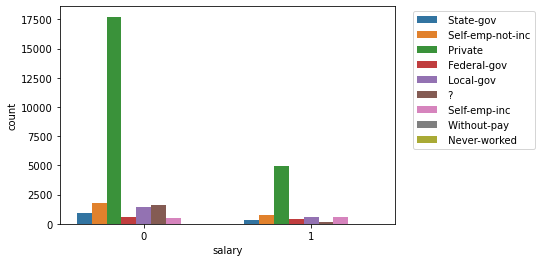

In [1498]:
sns.countplot(x='salary', hue='workclass', data=salary_df,capsize=.05)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

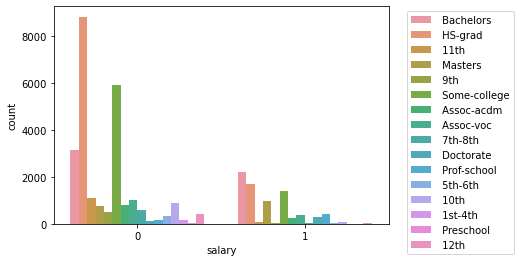

In [1499]:
sns.countplot(x='salary', hue='education', data=salary_df,capsize=.05)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

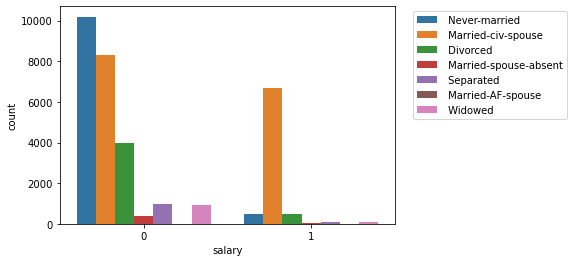

In [1500]:
sns.countplot(x='salary', hue='marital-status', data=salary_df,capsize=.05)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

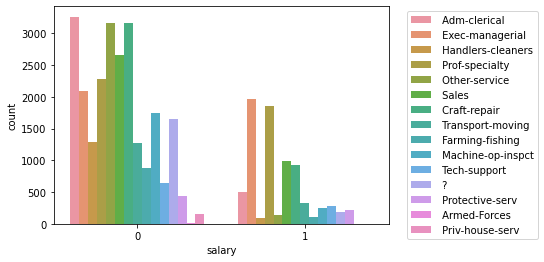

In [1501]:
sns.countplot(x='salary', hue='occupation', data=salary_df,capsize=.05)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

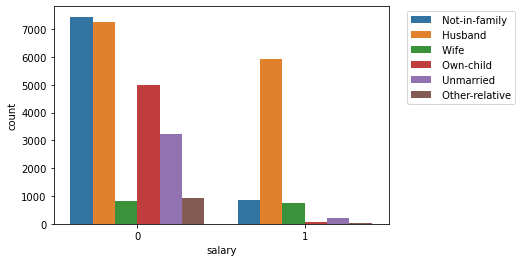

In [1502]:
sns.countplot(x='salary', hue='relationship', data=salary_df,capsize=.05)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

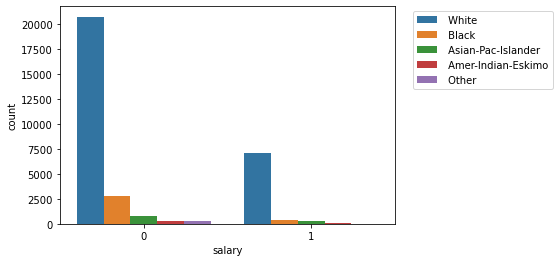

In [1503]:
sns.countplot(x='salary', hue='race', data=salary_df,capsize=.05)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

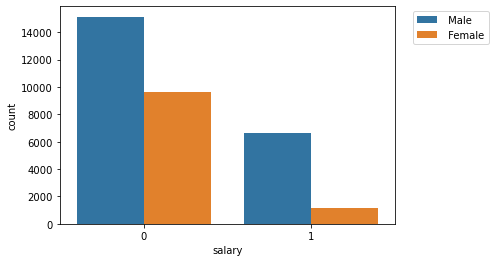

In [1504]:
sns.countplot(x='salary', hue='sex', data=salary_df,capsize=.05)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

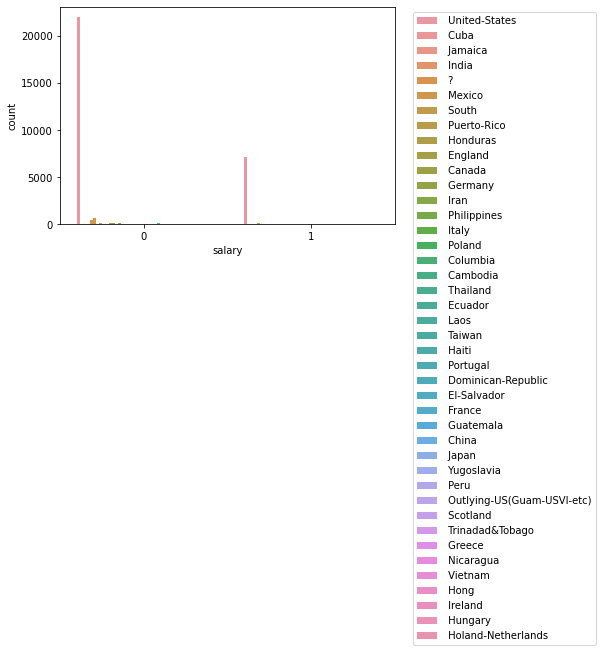

In [1505]:
sns.countplot(x='salary', hue='native-country', data=salary_df,capsize=.05)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

In [1506]:
#Part 2: Feature Preprocessing

In [1507]:
# Get feature space by dropping useless feature (Here are no columns which will be dropped)
to_drop = ["workclass","education","marital-status","occupation","relationship","salary"]
X = salary_df.drop(to_drop, axis=1)
X.head()

,age,fnlwgt,education-num,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,77516,13,White,Male,2174,0,40,United-States
1,50,83311,13,White,Male,0,0,13,United-States
2,38,215646,9,White,Male,0,0,40,United-States
3,53,234721,7,Black,Male,0,0,40,United-States
4,28,338409,13,Black,Female,0,0,40,Cuba


In [1508]:
X.dtypes

age                int64
fnlwgt             int64
education-num      int64
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

In [1509]:
cat_cols = X.columns[X.dtypes == 'object']
num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]

In [1510]:
num_cols

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [1511]:
cat_cols

Index(['race', 'sex', 'native-country'], dtype='object')

In [1512]:
X["sex"].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [1513]:
X["race"].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [1514]:
X["native-country"].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [1515]:
X["race"]=X["race"].str.strip()
X["sex"]=X["sex"].str.strip()
X["native-country"]=X["native-country"].str.strip()

In [1516]:
#Grouping the categories columns

In [1517]:
continents=[]
for i in X["native-country"]:
    if (i=="United-States" or i=="Canada" or i=="Outlying-US(Guam-USVI-etc)"):
        continents.append("North-America")
    elif (i=="Philippines" or i=="India" or i=="China" or i=="Vietnam" or i=="Japan" or i=="Taiwan" or i=="Iran" or i=="Hong" or i=="Laos" or i=="Thailand" or i=="South" or i=="Cambodia"):
        continents.append("Asia")
    elif (i=="Mexico" or i=="Puerto-Rico" or i=="Cuba" or i=="El-Salvador" or i=="Jamaica" or i=="Guatemala" or i=="Dominican-Republic" or i=="Columbia" or i=="Haiti" or i=="Nicaragua" or i=="Ecuador" or i=="Peru" or i=="Trinadad&Tobago" or i=="Honduras"):
        continents.append("Latin_America")
    elif i=="?":
        continents.append("Unknown")
    else:
        continents.append("Europe")
X["native-country"]=continents
print(X["native-country"].value_counts())

North-America    29305
Latin_America     1401
Asia               751
Unknown            583
Europe             521
Name: native-country, dtype: int64


In [1518]:
X=X.rename(columns={'native-country':'Continents'})
X

,age,fnlwgt,education-num,race,sex,capital-gain,capital-loss,hours-per-week,Continents
0,39,77516,13,White,Male,2174,0,40,North-America
1,50,83311,13,White,Male,0,0,13,North-America
2,38,215646,9,White,Male,0,0,40,North-America
3,53,234721,7,Black,Male,0,0,40,North-America
4,28,338409,13,Black,Female,0,0,40,Latin_America
...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,White,Female,0,0,38,North-America
32557,40,154374,9,White,Male,0,0,40,North-America
32558,58,151910,9,White,Female,0,0,40,North-America
32559,22,201490,9,White,Male,0,0,20,North-America


In [1519]:
# One hot encoding 
X=pd.get_dummies(X,columns=["race","sex","Continents"])
X=X.drop(['race_Other','sex_Female','Continents_Unknown'],axis=1)
X

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_White,sex_Male,Continents_Asia,Continents_Europe,Continents_Latin_America,Continents_North-America
0,39,77516,13,2174,0,40,0,0,0,1,1,0,0,0,1
1,50,83311,13,0,0,13,0,0,0,1,1,0,0,0,1
2,38,215646,9,0,0,40,0,0,0,1,1,0,0,0,1
3,53,234721,7,0,0,40,0,0,1,0,1,0,0,0,1
4,28,338409,13,0,0,40,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,1,0,0,0,0,1
32557,40,154374,9,0,0,40,0,0,0,1,1,0,0,0,1
32558,58,151910,9,0,0,40,0,0,0,1,0,0,0,0,1
32559,22,201490,9,0,0,20,0,0,0,1,1,0,0,0,1


In [1520]:
#Split dataset

In [1521]:
# Splite data into training and testing
# 100 -> 75:y=1, 25:y=0
# training(80): 60 y=1; 20 y=0 
# testing(20):  15 y=1; 5 y=0

from sklearn import model_selection

# Reserve 25% for testing

# stratify example: (也就是这里分层抽样后训练集和测试集中的target变量比例与总样本的target变量的比例一致)
# 100 -> y: 80 '0', 20 '1' -> 4:1
# 80% training 64: '0', 16:'1' -> 4:1
# 20% testing  16:'0', 4: '1' -> 4:1
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y, random_state=1) #stratified sampling

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 24420 observation with 15 features
test data has 8141 observation with 15 features


In [1522]:
X_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_White,sex_Male,Continents_Asia,Continents_Europe,Continents_Latin_America,Continents_North-America
6770,30,378723,10,0,0,55,0,0,0,1,0,0,0,0,1
30361,36,422275,3,0,0,40,0,0,0,1,1,0,0,1,0
8764,53,29231,4,0,0,35,0,0,0,1,1,0,0,0,1
20326,26,59367,13,0,0,40,0,0,0,1,1,0,0,0,1
13684,42,190786,11,0,0,40,0,0,0,1,1,0,0,0,1


In [1523]:
X_test.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_White,sex_Male,Continents_Asia,Continents_Europe,Continents_Latin_America,Continents_North-America
24860,23,447488,5,0,0,35,0,0,0,1,1,0,0,1,0
13003,64,277657,9,0,0,24,0,0,0,1,0,0,0,0,1
5838,19,391329,10,0,0,30,0,0,0,1,0,0,0,0,1
18199,31,62374,9,0,0,50,0,0,0,1,1,0,0,0,1
32190,34,220362,13,0,0,40,0,0,0,1,1,0,0,0,1


In [1524]:
# Scale the data, using standardization
# standardization (x-mean)/std
# normalization (x-x_min)/(x_max-x_min) ->[0,1]

# 1. speed up gradient descent
# 2. same scale
# 3. algorithm requirments

# for example, use training data to train the standardscaler to get mean and std 
# apply mean and std to both training and testing data.
# fit_transform does the training and applying, transform only does applying.
# Because we can't use any info from test, and we need to do the same modification
# to testing data as well as training data

# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
# https://scikit-learn.org/stable/modules/preprocessing.html

# min-max example: (x-x_min)/(x_max-x_min)
# [1,2,3,4,5,6,100] -> fit(min:1, max:6) (scalar.min = 1, scalar.max = 6) -> transform [(1-1)/(6-1),(2-1)/(6-1)..]
# scalar.fit(train) -> min:1, max:100
# scalar.transform(apply to x) -> apply min:1, max:100 to X_train
# scalar.transform -> apply min:1, max:100 to X_test

# scalar.fit -> mean:1, std:100
# scalar.transform -> apply mean:1, std:100 to X_train
# scalar.transform -> apply mean:1, std:100 to X_test

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [1525]:
X_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_White,sex_Male,Continents_Asia,Continents_Europe,Continents_Latin_America,Continents_North-America
6770,-0.627682,1.797658,-0.034983,-0.146435,-0.215273,1.178792,0,0,0,1,0,0,0,0,1
30361,-0.186730,2.210280,-2.768069,-0.146435,-0.215273,-0.034838,0,0,0,1,1,0,0,1,0
8764,1.062633,-1.513517,-2.377628,-0.146435,-0.215273,-0.439382,0,0,0,1,1,0,0,0,1
20326,-0.921650,-1.228001,1.136339,-0.146435,-0.215273,-0.034838,0,0,0,1,1,0,0,0,1
13684,0.254221,0.017096,0.355458,-0.146435,-0.215273,-0.034838,0,0,0,1,1,0,0,0,1


In [1526]:
#Part 3: Model Training and Result Evaluation

In [1527]:
#Part 3.1: Model Training

In [1528]:
#build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [1529]:
# Train the model
classifier_logistic.fit(X_train, y_train)
classifier_KNN.fit(X_train, y_train)
classifier_RF.fit(X_train, y_train)

# Prediction of test data
classifier_logistic.predict(X_test)
classifier_KNN.predict(X_test)
classifier_RF.predict(X_test)


# Accuracy of test data
print("Logic-Regression",classifier_logistic.score(X_test, y_test))
print("KNN",classifier_KNN.score(X_test, y_test))
print("Random-Forest",classifier_RF.score(X_test, y_test))
# Judging from the brief view, 
#we could find that Random-Forest has the best performance, while KNN has the poorest performance.

C:\Users\Apple\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logic-Regression 0.823731728288908
KNN 0.8091143594153053
Random-Forest 0.8250829136469722


In [1530]:
#(Optional) Part 3.2: Use Grid Search to Find Optimal Hyperparameters

In [1531]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [1532]:
#Part 3.2.1: Find Optimal Hyperparameters - LogisticRegression

In [1533]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the 1/lambda value(weight) for L1 and L2
# solver: algorithm to find the weights that minimize the cost function

# ('l1', 0.01)('l1', 0.05) ('l1', 0.1) ('l1', 0.2)('l1', 1)
# ('12', 0.01)('l2', 0.05) ('l2', 0.1) ('l2', 0.2)('l2', 1)
parameters = {
    'penalty':('l2','l1'), 
    'C':(0.01, 0.05, 0.1, 0.2, 1)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 0.05, 0.1, 0.2, 1),
                         'penalty': ('l2', 'l1')})

In [1534]:
# the best hyperparameter combination
# C = 1/lambda
print_grid_search_metrics(Grid_LR)

Best score: 0.8233824733824733
Best parameters set:
C:1
penalty:l1


In [1535]:
# best model
best_LR_model = Grid_LR.best_estimator_

In [1536]:
best_LR_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [1537]:
best_LR_model.score(X_test, y_test)

0.8238545633214592

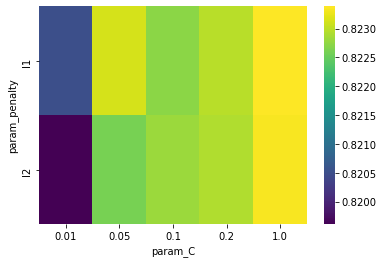

In [1538]:
LR_models = pd.DataFrame(Grid_LR.cv_results_)
res = (LR_models.pivot(index='param_penalty', columns='param_C', values='mean_test_score')
            )
_ = sns.heatmap(res, cmap='viridis')

In [1539]:
#Part 3.2.2: Find Optimal Hyperparameters: KNN

In [1540]:
# Possible hyperparamter options for KNN
# Choose k
parameters = {
    'n_neighbors':[1,3,5,7,9]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

In [1541]:
# best k
print_grid_search_metrics(Grid_KNN)

Best score: 0.8177723177723178
Best parameters set:
n_neighbors:9


In [1542]:
best_KNN_model = Grid_KNN.best_estimator_

In [1543]:
#Part 3.2.3: Find Optimal Hyperparameters: Random Forest

In [1544]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [60,80,100],
    'max_depth': [1,5,10]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [60, 80, 100]})

In [1545]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.8429565929565929
Best parameters set:
max_depth:10
n_estimators:80


In [1546]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

In [1547]:
best_RF_model

RandomForestClassifier(max_depth=10, n_estimators=80)

Part 3.3: Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

class of interest as positive
TP: correctly labeled salary(>50K)

Precision(PPV, positive predictive value): tp / (tp + fp); 
Total number of true predictive salary(>50K) divided by the total number of predictive salary(>50K); 

High Precision means low fp, not many person were predicted as salary(>50K) person.

Recall(sensitivity, hit rate, true positive rate): 
tp / (tp + fn) Predict most postive or salary(>50K) person correctly. 
High recall means low fn, not many salary(>50K) person were predicted as salary(>50K) person.

In [1548]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['<=50K','>50K']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

In [1549]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

Random Forest
Accuracy is: 0.8448593538877288
precision is: 0.7896924355777224
recall is: 0.4846938775510204
Logistic Regression
Accuracy is: 0.8238545633214592
precision is: 0.7180762852404643
recall is: 0.4418367346938776
K nearest neighbor
Accuracy is: 0.8173443065962412
precision is: 0.6607749830047587
recall is: 0.4959183673469388


In [1550]:
#Part 3.4: Model Evaluation - ROC & AUC

RandomForestClassifier, KNeighborsClassifier and LogisticRegression have predict_prob() function

In [1551]:
#Part 3.4.1: ROC of RF Model

In [1552]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

In [1553]:
best_RF_model.predict_proba(X_test)

array([[0.99098004, 0.00901996],
       [0.92793406, 0.07206594],
       [0.99087352, 0.00912648],
       ...,
       [0.70102959, 0.29897041],
       [0.68630798, 0.31369202],
       [0.18760138, 0.81239862]])

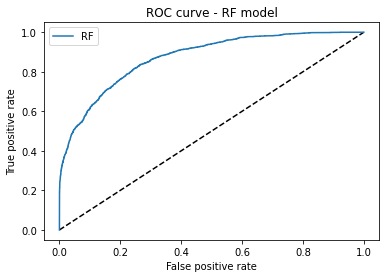

In [1554]:
# ROC curve of Random Forest result
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [1555]:
from sklearn import metrics

# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.8725247549270476

In [1556]:
#Part 3.4.1: ROC of LR Model
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresh = roc_curve(y_test, y_pred_lr)

In [1557]:
best_LR_model.predict_proba(X_test)

array([[0.98716597, 0.01283403],
       [0.90698511, 0.09301489],
       [0.97136814, 0.02863186],
       ...,
       [0.7520408 , 0.2479592 ],
       [0.76237762, 0.23762238],
       [0.2009579 , 0.7990421 ]])

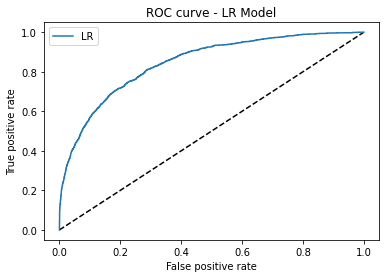

In [1558]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [1559]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.8454682139803017

In [1560]:
#Part 4: Model Extra Functionality

In [1561]:
#Part 4.1: Logistic Regression Model
#The corelated features that we are interested in

In [1562]:
# add L1 regularization to logistic regression
# check the coef for feature selection
LRmodel_l1 = LogisticRegression(penalty="l1", C = 0.04, solver='liblinear')
LRmodel_l1.fit(X, y)

indices = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1] 
print(indices)
#Numpy中的argsort函数返回的是每个元素的排序序号 其中最小的数字序列号是0 第二小的数学序列号是1 类推
#而这里的[::-1] 的意思是将列表的顺序反转

print ("Logistic Regression (L1) Coefficients")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(LRmodel_l1.coef_[0][indices[ind]], 4)))

[ 8  7  9  6 13 10 14 11  2 12  0  5  4  3  1]
Logistic Regression (L1) Coefficients
race_Black : -1.78
race_Asian-Pac-Islander : -1.5407
race_White : -1.3458
race_Amer-Indian-Eskimo : -1.3215
Continents_Latin_America : -1.1274
sex_Male : 0.961
Continents_North-America : -0.593
Continents_Asia : -0.2714
education-num : 0.2417
Continents_Europe : -0.1137
age : 0.0307
hours-per-week : 0.0238
capital-loss : 0.0007
capital-gain : 0.0003
fnlwgt : -0.0


In [1563]:
# add L2 regularization to logistic regression
# check the coef for feature selection
np.random.seed()
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X_with_corr)
LRmodel_l2 = LogisticRegression(penalty="l2", C = 0.1, solver='liblinear', random_state=42)
LRmodel_l2.fit(X_l2, y)
LRmodel_l2.coef_[0]

indices = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print ("Logistic Regression (L2) Coefficients")
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l2.coef_[0][indices[ind]], 4)))

Logistic Regression (L2) Coefficients
capital-gain : 2.2299
education-num : 0.8403
age : 0.5624
sex_Male : 0.5351
hours-per-week : 0.411
capital-loss : 0.2706
race_White : 0.1776
Continents_North-America : 0.0856
race_Asian-Pac-Islander : 0.0691
fnlwgt : 0.0655
Continents_Latin_America : -0.0549
Continents_Europe : 0.0547
Continents_Asia : 0.0372
race_Amer-Indian-Eskimo : -0.0156
race_Black : 0.0147


In [1564]:
#Part 4.2: Random Forest Model - Feature Importance Discussion

In [1565]:
X_RF = X.copy()

# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X_RF, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X_RF.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
fnlwgt : 0.3258
age : 0.2068
capital-gain : 0.131
education-num : 0.1251
hours-per-week : 0.1043
capital-loss : 0.0483
sex_Male : 0.0358
Continents_North-America : 0.0046
race_White : 0.0045
race_Black : 0.0037
Continents_Latin_America : 0.0033
Continents_Europe : 0.0021
race_Asian-Pac-Islander : 0.0019
Continents_Asia : 0.0018
race_Amer-Indian-Eskimo : 0.0011
